In [1]:
from bigraph_viz import plot_bigraph

save_images = False
plot_settings = {'remove_process_place_edges': True}
if save_images:
    plot_settings.update({
        'out_dir': 'out',
        'dpi': '250'})

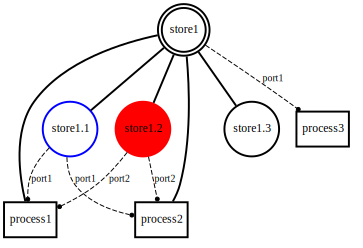

In [2]:
nested_composite_spec = {
    'store1': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'int',
        },
        'store1.3': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'process1': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        'wires': {
            'port1': 'store1',
        }
    }
}
plot_settings['node_border_colors'] = {
    ('store1', 'store1.1'): 'blue'
}
plot_settings['node_fill_colors'] = {
    ('store1', 'store1.2'): 'red'
}
plot_bigraph(nested_composite_spec, **plot_settings)

path here ('store1', 'store1.3')


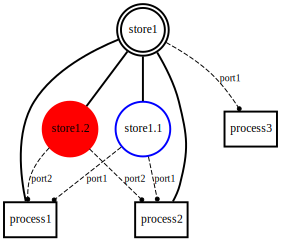

In [3]:
remove_nodes = [('store1', 'store1.3'),]
plot_bigraph(nested_composite_spec, **plot_settings, remove_nodes=remove_nodes)

In [4]:
instance1 = {
    'time_start': 0,
    'time_end': 10,
    'num_points': 50,
    'selection_list': ['time', 'S', 'Z'],
    'UTC': '"UTC"',
    'model_path': '"susceptible_zombie.xml"',
    'curves': {
        'Susceptible': {'x': 'time', 'y': 'S'},
        'Zombie': {'x': 'time', 'y': 'Z'}
    },
    'figure1name': '"Figure1"',
    'sbml_model_from_path': {
        '_type': 'sed:sbml_model_from_path',
        'wires': {
            'path_to_sbml': 'model_path',
            'model': 'model_instance'
        },
        '_depends_on': [],
    },
    'plot2d': {
        '_type': 'sed:plot2d',
        'wires': {
            'results': 'results',
            'curves': 'curves',
            'name': 'figure1name',
        },
        '_depends_on': ['uniform_time_course'],
    },
    'uniform_time_course': {
        '_type': 'sed:uniform_time_course',
        'wires': {
            'model': 'model_instance',
            'time_start': 'time_start',
            'time_end': 'time_end',
            'num_points': 'num_points',
            'selection_list': 'selection_list',
            'results': 'results',
        },
        '_depends_on': ['sbml_model_from_path'],
    },
}

path here ('curves', 'Susceptible')
path here ('curves', 'Zombie')


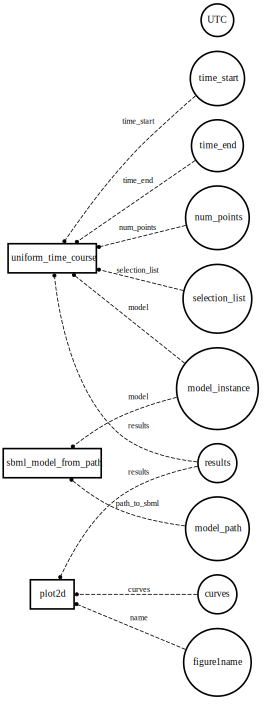

In [7]:
remove_nodes = [('curves', 'Susceptible',), ('curves', 'Zombie',)]
plot_bigraph(instance1, remove_nodes=remove_nodes, rankdir='RL')

In [6]:
my_tuple = (0, 1)
list_of_tuples = [(0, 1), (1, 2, 4), (1, 3, 2), (3, 4)]

# result = any(big_tuple[:len(my_tuple)] == my_tuple for big_tuple in list_of_tuples)
result = any(big_tuple == my_tuple[:len(big_tuple)] for big_tuple in list_of_tuples)
print(result)  # Output: True


True
